In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from adjustText import adjust_text

In [3]:
p8 = pd.read_csv("/home/wak/toprak-lab/aml_drug_synergy/dump/sigmoid_synergy_estimations/All synergistic pairs 8x8.csv")
p11 = pd.read_csv("/home/wak/toprak-lab/aml_drug_synergy/dump/sigmoid_synergy_estimations/All synergistic pairs 11x11.csv")

In [4]:
p8

,cell_line,drugA,drugB,dIC50
0,HL60,ABT199,DAU,-6.824014
1,FKH1,ABT199,DAC,-4.610399
2,FKH1,ABT199,FLD,-4.350784
3,HL60,ABT199,AZC,-4.050943
4,HL60,ABT199,AG221,-3.947345
...,...,...,...,...
611,TF1,ATRA,IDA,NaN
612,TF1,ATRA,MTX,NaN
613,TF1,ATRA,Mito,NaN
614,TF1,ATRA,VP16,NaN


In [5]:
mix = pd.merge(left=p8,right=p11,on=['cell_line','drugA','drugB'],how='inner')
mix

,cell_line,drugA,drugB,dIC50_x,dIC50_y
0,FKH1,ABT199,DAC,-4.610399,0.244143
1,HL60,ABT199,AZC,-4.050943,NaN
2,FKH1,ABT199,AZC,-3.369533,-3.778411
3,K562,2CdA,AG221,-3.243834,-9.073625
4,FKH1,ABT199,IDA,-3.029298,-2.818797
...,...,...,...,...,...
88,Kasumi1,6MP,AG221,NaN,-1.342218
89,Kasumi1,6MP,Mito,NaN,-1.683503
90,Kasumi1,6TG,AG221,NaN,-0.970743
91,Kasumi1,6TG,AZC,NaN,-0.914794


In [6]:
mixf = mix.loc[~pd.isna(mix['dIC50_x']) & ~pd.isna(mix['dIC50_y']),:]
mixf = mixf[mixf['cell_line']!='IDH2']

In [7]:
mixf

,cell_line,drugA,drugB,dIC50_x,dIC50_y
0,FKH1,ABT199,DAC,-4.610399,0.244143
2,FKH1,ABT199,AZC,-3.369533,-3.778411
3,K562,2CdA,AG221,-3.243834,-9.073625
4,FKH1,ABT199,IDA,-3.029298,-2.818797
6,Kasumi1,AG221,MTX,-2.794706,-2.617985
8,Kasumi1,MTX,VP16,-2.326737,-1.317625
10,FKH1,6TG,ABT199,-2.124312,-1.898942
11,FKH1,ABT199,AraC,-2.101888,-1.644330
12,HL60,2CdA,FLD,-2.088118,-1.637911
14,K562,AG221,VP16,-1.996730,-0.160909


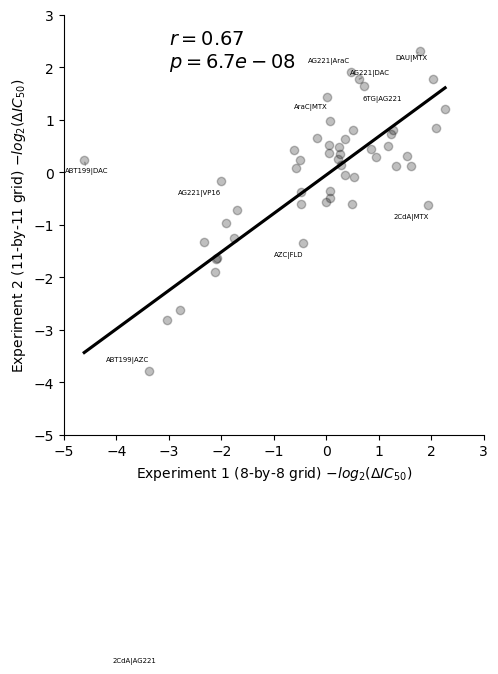

In [37]:
#plt.scatter(mix['dIC50_x'],mix['dIC50_y'])
g = sns.lmplot(mixf, x='dIC50_x', y='dIC50_y', ci=None,
               scatter_kws={'color': 'black', 'alpha':0.25},
               line_kws={'color': 'black'})
labels = [ g.ax.text(r['dIC50_x'], r['dIC50_y'], f"{r['drugA']}|{r['drugB']}", ha='center', va='center', fontsize=5)
           for i, r in mixf.iterrows() if abs(0.67*r['dIC50_x']-r['dIC50_y'])>=1]
adjust_text(labels, time_lim=1, force_static=(1,2), arrowprops=dict(arrowstyle='-', color='gray', alpha=.9))
g.ax.axis('square')
g.ax.set_xlim([-5,3])
g.ax.set_ylim([-5,3])
g.ax.set_xlabel('Experiment 1 (8-by-8 grid) $-log_2(\\Delta IC_{50})$')
g.ax.set_ylabel('Experiment 2 (11-by-11 grid) $-log_2(\\Delta IC_{50})$')
np.ma.corrcoef(np.ma.masked_invalid(mix['dIC50_x']),np.ma.masked_invalid(mix['dIC50_y']))
r, p = sp.stats.pearsonr(mixf['dIC50_x'],mixf['dIC50_y'])
g.ax.text(-3,2, f'$r={r:.2}$\n$p={p:.2}$',fontsize=14)
g.fig.savefig('../dump/8x8 vs 11x11 dIC50 correlation.png',dpi=600, bbox_inches='tight')